## data path 

In [1]:
train_path=r'D:\Compressed\tomato disease big data\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'

valid_path=r'D:\Compressed\tomato disease big data\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'

test_path=r'D:\Compressed\tomato disease big data\test'


## import all the library 



In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import os
import torch 
import glob as gb
import torch.nn as nn
from torchvision.transforms import transforms 
from torch.utils.data import DataLoader
from torch.optim import Adam 
from torch.autograd import variable
import torchvision 
import pathlib 
import seaborn as sns 
sns.set(style='whitegrid')
import cv2
import h5py 
import math 
import keras.backend as K 
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
from matplotlib.pyplot import imshow



%matplotlib inline




from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential 
from tensorflow.keras.models import Model
import keras 
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D


Using TensorFlow backend.


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## directory

## train_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_path,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')


## create a train_data generator

In [4]:
def train_generator():
   
    train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.4)
    #train generator 
    train_generator=train_datagen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                subset='validation')
    #vaid_generator 
    valid_generator=train_datagen.flow_from_directory(valid_path,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='validation')
    test_generator=train_datagen.flow_from_directory(test_path,
                                                target_size=(224,224),
                                                batch_size=1,
                                                class_mode='categorical',
                                                subset='validation')
    return train_generator,valid_generator,test_generator

In [5]:
train_generator,valid_generator,test_generator=train_generator()

Found 28102 images belonging to 38 classes.
Found 7016 images belonging to 38 classes.
Found 13 images belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


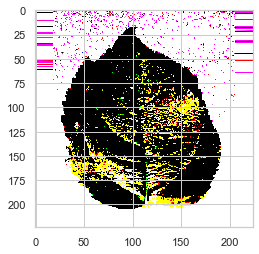

In [6]:
plt.imshow(train_generator[0][0][31])
plt.grid('off')

## find classes

In [7]:

def classes_and_code():
    root=pathlib.Path(train_path)
    classes=[ i for i in os.listdir(train_path) if '.' not in i]
    Code=[]
    for i in range(len(classes)):
        Code+={classes[i]}
        Code+=[i]
    code={Code[i]:Code[i+1] for i in range(0,len(Code),2)}
    
    return classes,code
    

In [8]:

classes,code=classes_and_code()



In [9]:
def getcode(n):
    classes,code=classes_and_code()
    for x,y in code.items():
        if n==y:
            return x


## number of images

In [10]:
def train_image_number(print_n=False):
    summation=[]
    for folder in os.listdir(train_path):
        files=gb.glob(str(train_path+'/'+folder+'/*.jpg'))
        if print_n==True:
            
            print(f' for training data , found {len(files)} in folder { folder} \n')
        summation.append(len(files))
    return summation    

In [11]:
train_image_no=train_image_number()
sum(train_image_no)

70295

In [12]:
def validation_image_number(print_n=False):
    summation=[]
    for folder in os.listdir(valid_path):
        files=gb.glob(str(valid_path+'/'+folder+'/*.jpg'))
        if print_n==True:
            
            print(f' for validation data , found {len(files)} in folder { folder} \n')
        summation.append(len(files))
    return summation    

    

In [13]:
val_im_no=validation_image_number()
sum(val_im_no)

17572

In [14]:
def X_and_Y(size):
    classes,code=classes_and_code()
    
    X=[]
    Y=[]
    for folder in os.listdir(train_path):
        files=gb.glob(str(train_path+'/'+folder+'/*.jpg'))
        for file in files:
            image=cv2.imread(file)
            image_array=cv2.resize(image,(size,size))
            X.append(list(image_array))
            Y.append(code[folder])
    X=np.array(X)
    Y=np.array(Y)
    return X,Y

In [ ]:
X,Y=X_and_Y(size=227)

In [ ]:
X.shape

In [ ]:
X=X/255


## Happy_model

In [ ]:
def Happy_model(input_shape):
    # input ,input_shpae
    X_input=Input(input_shape)
    
    # zero padding 
    X=ZeroPadding2D((3,3))(X_input)
    
    # convolutional 
    X=Conv2D(32,kernel_size=(7,7),strides=(1,1),name='conv0')(X)
    
    #batchnormalization 
    X=BatchNormalization(axis=3,name='bn0')(X)
    # activation 
    
    X=Activation('relu')(X)
    
    #maxpooling
    
    X=MaxPool2D((2,2),name='max_pool')(X)
    
    
    
    
    #2nd layer 
    
    
    #flatten
    X=Flatten()(X)
    X=Dense(37,activation='softmax',name='fc')(X)
    model=Model(inputs=X_input,outputs=X,name='HappyModel')
    return model
    

In [ ]:
def AlexNet(input_shape):
    X_input=Input(input_shape)
    
    # zero padding 
    X=ZeroPadding2D((3,3))(X_input)
    
    # 1st convolutional 
    X=Conv2D(96,kernel_size=(11,11),strides=(4,4),name='conv0')(X)
    
    #batchnormalization 
    X=BatchNormalization(axis=3,name='bn0')(X)
    # activation 
    
    X=Activation('relu')(X)
    
    #maxpooling
    
    X=MaxPool2D((3,3),name='max_pool0',strides=(2,2))(X)
    
    
    #2nd convolutional 
    X=Conv2D(96,kernel_size=(5,5),strides='same',name='conv1')(X)
    
    #BatchNormalization
    X=BatchNormalization(axis=3,name='bn1')(X)
    
    #activation 2
    X=Activation('relu')(X)
    
    #maxpooling 2D
    X=MaxPool2D((3,3),name='max_pool0',strides= d))(X)
    

In [10]:
transformer=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],
                        [0.5,0.5,0.5])
])

In [11]:
train_loader=DataLoader(torchvision.datasets.ImageFolder(
    train_path,transform=transformer),
                       batch_size=32,
                       shuffle=True)

In [12]:
valid_loader=DataLoader(torchvision.datasets.ImageFolder(
valid_path,transform=transformer),
                       batch_size=32,
                       shuffle=True)


In [13]:
test_loader=DataLoader(torchvision.datasets.ImageFolder(
test_path,transform=transformer),
                      batch_size=1,
                      shuffle=True)

In [14]:
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [15]:
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [16]:
for folder in os.listdir(train_path):
    files=gb.glob(str(train_path+'/'+folder+'/*.jpg'))
    print( f'For training data , found {len(files)} in folder {folder} \n')

For training data , found 2016 in folder Apple___Apple_scab 

For training data , found 1987 in folder Apple___Black_rot 

For training data , found 1760 in folder Apple___Cedar_apple_rust 

For training data , found 2008 in folder Apple___healthy 

For training data , found 1816 in folder Blueberry___healthy 

For training data , found 1826 in folder Cherry_(including_sour)___healthy 

For training data , found 1683 in folder Cherry_(including_sour)___Powdery_mildew 

For training data , found 1642 in folder Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 

For training data , found 1907 in folder Corn_(maize)___Common_rust_ 

For training data , found 1859 in folder Corn_(maize)___healthy 

For training data , found 1908 in folder Corn_(maize)___Northern_Leaf_Blight 

For training data , found 1888 in folder Grape___Black_rot 

For training data , found 1920 in folder Grape___Esca_(Black_Measles) 

For training data , found 1692 in folder Grape___healthy 

For training data , foun

In [17]:
for folder in os.listdir(valid_path):
    files=gb.glob(str(valid_path +'/'+folder+'/*.jpg'))
    print(f' For valid data , found {len(files)} in folder {folder} \n')

 For valid data , found 504 in folder Apple___Apple_scab 

 For valid data , found 497 in folder Apple___Black_rot 

 For valid data , found 440 in folder Apple___Cedar_apple_rust 

 For valid data , found 502 in folder Apple___healthy 

 For valid data , found 454 in folder Blueberry___healthy 

 For valid data , found 456 in folder Cherry_(including_sour)___healthy 

 For valid data , found 421 in folder Cherry_(including_sour)___Powdery_mildew 

 For valid data , found 410 in folder Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 

 For valid data , found 477 in folder Corn_(maize)___Common_rust_ 

 For valid data , found 465 in folder Corn_(maize)___healthy 

 For valid data , found 477 in folder Corn_(maize)___Northern_Leaf_Blight 

 For valid data , found 472 in folder Grape___Black_rot 

 For valid data , found 480 in folder Grape___Esca_(Black_Measles) 

 For valid data , found 423 in folder Grape___healthy 

 For valid data , found 430 in folder Grape___Leaf_blight_(Isariop

In [18]:
for folder in os.listdir(test_path):
    files=gb.glob(str(test_path +'/'+folder +'/*.jpg'))
    print(f'for test data find {len(files)} in Folder {folder} \n')

for test data find 33 in Folder test 



In [34]:
classes[0]

'Apple___Apple_scab'

In [35]:
code=[]
for i in range(len(classes)):
    code+={classes[i]}
    code+=[i]

In [36]:

Code={code[i] :code[i+1] for i in range(0,len(code),2)}


In [37]:
Code

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
Code=convert(code)

size=224
X_train=[]
y_train=[]
for folder in os.listdir(train_path):
    files=gb.glob(str(train_path+'/'+folder+'/*.jpg'))
    for file in files:
        image=cv2.imread(file)
        image_array=cv2.resize(image,(size,size))
        X_train.append(list(image_array))
        y_train.append(Code[folder])

size=[]
for folder in os.listdir(train_path):
    files=gb.glob(str(train_path+'/'+folder+'/*.jpg'))
    for file in files:
        image=plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts        

In [43]:
def getcode(n):
    for x,y in Code.items():
        if n==y:
            return x
        

In [49]:
train_generator[0][0][31].shape

(224, 224, 3)

In [61]:

def model(input_shape):
    X_input=Input(input_shape)
    
    # zero padding 
    X=ZeroPadding2D((3,3))(X_input)
    
    # convolutional 
    X=Conv2D(32,kernel_size=(7,7),strides=(1,1),name='conv0')(X)
    
    #batchnormalization 
    X=BatchNormalization(axis=3,name='bn0')(X)
    # activation 
    
    X=Activation('relu')(X)
    
    #maxpooling
    
    X=MaxPool2D((2,2),name='max_pool')(X)
    
    #flatten
    X=Flatten()(X)
    X=Dense(37,activation='softmax',name='fc')(X)
    model=Model(inputs=X_input,outputs=X,name='HappyModel')
    
    
    
    return model
    
    
    
    
    
    
    
    

In [65]:
happy_model=model((224,224,3))

In [66]:
happy_model.compile(optimizer='adam',loss='categorical_crossentropy')

In [67]:
happy_model.fit(x=train_generator,y=test_generator,epochs=5,batch_size=32)

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.